# Truth or Bluff Detector 

## Introduction 

When HR planning indicates the need for additional labor, organizations have a number of choices to make. Careful HR planning must consider the overall growth prospects of the organization and accurate forecasting of future labor needs. Recruitment planning begins only when other alternatives have been considered and eliminated. When one finds a deserving candidate it must decide on the salary of the candidate as per the industry standards.  

In this project we need to make a truth or bluff detector for the HR recruitment salary negotiation process to check if a candidate is giving us the true information about his/her last drawn salary, using the database Position_Salaries.csv. We have a specific case of a potential employee candidate tells he has 20+ years (Level 6.5) of experience and earned 160,000 annual salary in his previous company. Therefore, he is asking now for at least more than 160,000. We need to determine if he deserves it and if he is telling the truth using random forest regression model. 

Here we have 10 datapoints and three attributes in the dataset namely:

Position (The position in the company)
Level (The level of position as decided by the Company Policy)
Salary (The salary drawn by personnel’s at different position)

## Data exploration and preprocessing 

In [ ]:
# Importing the required libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [2]:
#Reading the csv file  
dataset = pd.read_csv('/Users/Lenovo/Desktop/Position_Salaries.csv')

In [22]:
#Viewing first 5 elements of the dataset 
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
#Preprocessing the dataset to create 2 arrays
X = dataset.iloc[:, 1:2].values #The 'Level' feature of the dataset
y = dataset.iloc[:, 2].values #The 'Salary' feature of the dataset 

Since we have a small dataset we do not split it into training and testing datasets. 

In [11]:
# Viewing the X array
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
#Viewing the y array 
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Random Forest Regression

In [33]:
#Fitting the random forest regression model with 10 tree (default value).
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

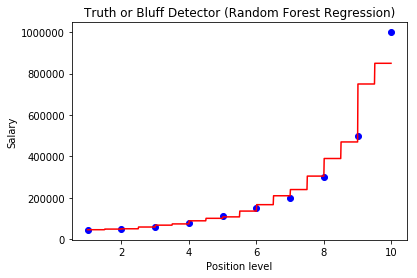

In [34]:
#Visualising the Regression result 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Truth or Bluff Detector (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [35]:
#Predicting the result for Level 6.5 using the model with 10 trees. 
y_pred10 = regressor.predict(6.5)
y_pred10

array([167000.])

The predicted value is close enough to what the candidate mentioned to the HR, but as we know from our previous project that the candidate was not bluffing about his previous salary using polynomial regression, we can increase the accuracy of the random forest model to get close to the 160000 mark but increasing the number of trees in the model. 

Hence we try to predict the salary using models with varying amount of trees before choosing the best fit model.  

In [25]:
#Fitting the random forest regression model with 100 trees.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

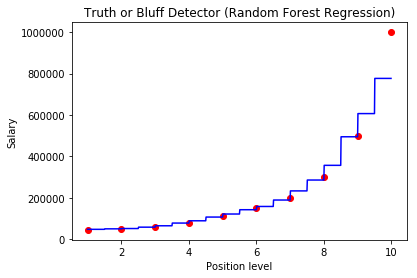

In [26]:
#Visualising the Regression result with 100 trees 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff Detector (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [21]:
#Predicting the result for Level 6.5 using the model with 100 trees 
y_pred100 = regressor.predict(6.5)
y_pred100

array([160600.])

In [27]:
#Fitting the random forest regression model with 300 trees.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

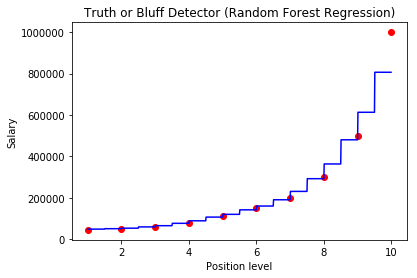

In [28]:
#Visualising the Regression result with 300 trees 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1)) #To smoothen out vertical lines of the model  
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff Detector (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [29]:
#Predicting the result for Level 6.5 using the model with 300 trees 
y_pred300 = regressor.predict(6.5)
y_pred300

array([160333.33333333])

In [30]:
#Fitting the random forest regression model with 500 trees.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

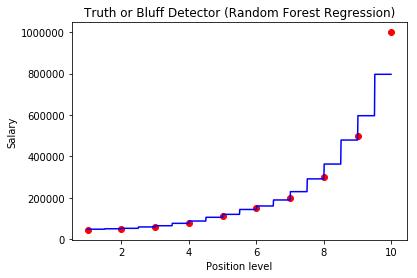

In [31]:
#Visualising the Regression result with 500 trees 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1)) #To smoothen out vertical lines of the model  
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff Detector (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [32]:
#Predicting the result for Level 6.5 using the model with 500 trees
y_pred500 = regressor.predict(6.5)
y_pred500

array([160600.])

After predicting results of Level 6.5 salary using random forest regression models with varying number of trees, we find that the predictions from models with 10, 100 and 500 trees were close enough but not accurate as the one with 300 trees.  

Hence we choose the random forest regression model with 300 trees as our predictor model. 

## Conclusion

As per our model, we find that the salary of an employee at level 6.5 tends to be nearly 160000 as we found out using polynomial regression about the last drawn salary by the candidate. We revised our random forest regression model to be accurate with the beforehand known salary. Hence in conclusion we find that the candidate is not bluffing and we can justify the amount of salary stated by the candidate as true using the random forest model with more accuracy.    